In [106]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.special import expit

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [116]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
print('Dimensions: ',data.shape)
data[1:6,:]

Dimensions:  (100, 3)


array([[ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ],
       [ 45.08327748,  56.31637178,   0.        ]])

In [10]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

In [6]:
# Get indexes for class 0 and class 1
neg = data[:,2] == 0
pos = data[:,2] == 1

In [118]:
def plotData(data, neg, pos):
    plt.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label='Admitted')
    plt.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend();

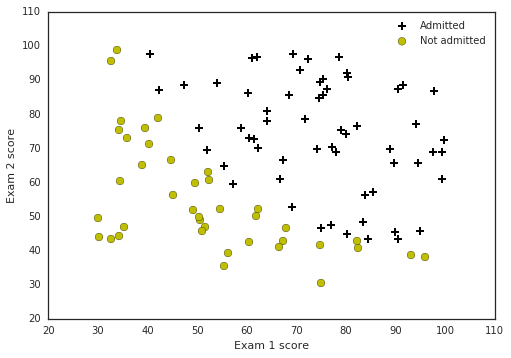

In [119]:
plotData(data, neg, pos)

### $$ \lambda\bigg(\frac{1}{2}(1−\alpha)|\beta|^2_2 \ +\ \alpha|\beta|_1\bigg) $$


#### Logistic regression hypothesis
### $$ h_{\theta}(x) = g(\theta^{T}x)$$
### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [ ]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

Scipy actually has a convenience function which does exactly the same:<BR>
http://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html#scipy.special.expit

#### Cost Function
### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m} [-y^{(i)} log( h_\theta (x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]$$

In [108]:
def costFunction(theta, *args):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    
    return(J)

#### Gradient

### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

In [91]:
def gradient(theta, *args):
    m = y.size
    h = sigmoid(X.dot(theta))
    grad =(1/m)*X.T.dot(h-y)

    return(grad)

In [109]:
initial_theta = np.zeros((X.shape[1],1))
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [[ 0.69314718]]
Grad: 
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


#### Optimize cost function

In [117]:
res = minimize(costFunction, initial_theta, args=(X,y), method='TNC', jac=None)
res

     nit: 20
 message: 'Max. number of function evaluations reached'
     fun: array([ 0.20349773])
 success: False
  status: 3
    nfev: 100
     jac: array([  3.33177930e-05,   1.40303880e-03,   2.92388336e-03])
       x: array([-25.16651938,   0.20625458,   0.20154206])

#### Decision boundary

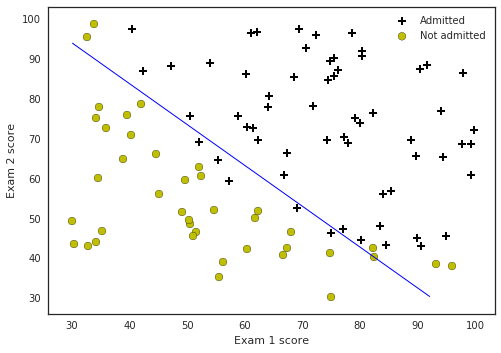

In [197]:
plotData(data, neg, pos)
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');